<a href="https://colab.research.google.com/github/tinak6501/First/blob/main/Scenario_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

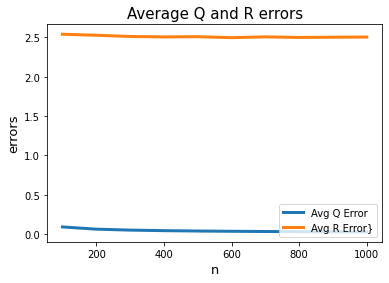

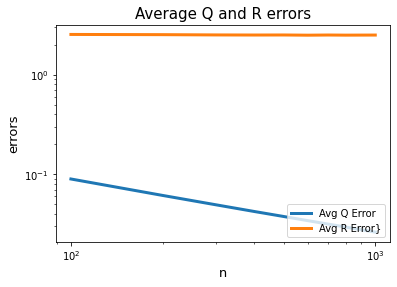

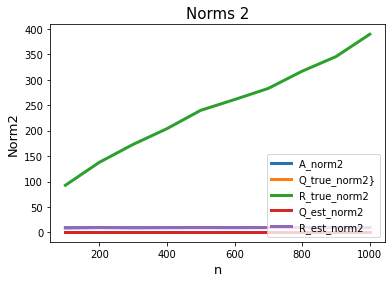

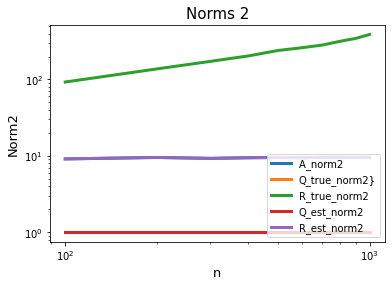

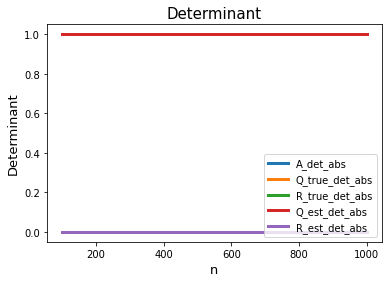

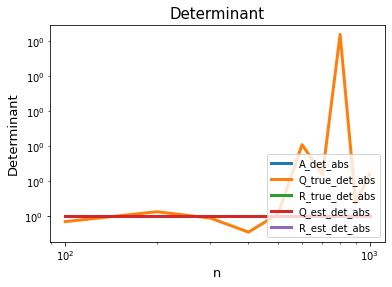

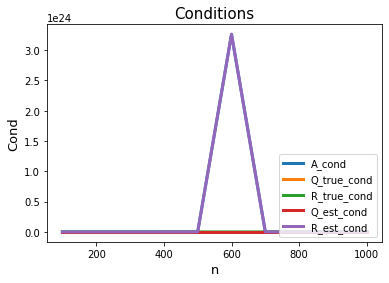

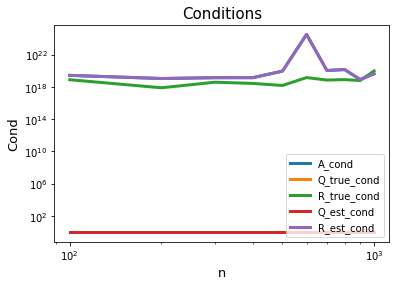

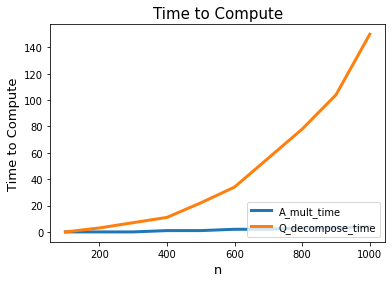

In [2]:
import time
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt 

i = 0
avg_q_error = []
avg_r_error = []
A_norm2  = []
Q_true_norm2 = []
R_true_norm2 = []
Q_est_norm2 = []
R_est_norm2 = []
A_det_abs = []
Q_true_det_abs = []
R_true_det_abs = []
Q_est_det_abs = []
R_est_det_abs = []
A_cond = []
Q_true_cond = []
R_true_cond = []
Q_est_cond = []
R_est_cond = []
A_mult_time = []
Q_decompose_time = []

# Looping over the range of 100 to 1000 by 100 steps
for n in range (100, 1001, 100):
  # Creating random matrix

  # generate a random matrix
  # R_true = np.random.rand(n, n)
  R_true = np.random.randint(-10, 10, (n, n))

  # Nullifying the lower part of the matrix
  R_true = np.triu(R_true)

  # Making the diagonal values positive
  np.fill_diagonal(R_true, np.abs(np.diag(R_true)))

  # Generating an orthogonal matrix of size n*n
  Q_true = ortho_group.rvs(n)

  # Computing the productuntion of A = Q_true * R_true
  start_time = round(time.time() * 1000)
  A = Q_true * R_true
  end_time = round(time.time() * 1000)
  A_mult_time.append(end_time-start_time)

  # Inverting the product by QR-decomposing A: Q_est, R_est = np.linalg.qr(A)
  start_time = round(time.time() * 1000)
  Q_est, R_est = np.linalg.qr(A)
  end_time = round(time.time() * 1000)
  Q_decompose_time.append(end_time-start_time)

  # Computing norm_2 of matrices A, Q_true, R_true, Q_est, R_est
  A_norm2.append(np.linalg.norm(A, 2))
  Q_true_norm2.append(np.linalg.norm(Q_true, 2))
  R_true_norm2.append(np.linalg.norm(R_true, 2))
  Q_est_norm2.append(np.linalg.norm(Q_est, 2))
  R_est_norm2.append(np.linalg.norm(R_est, 2))

  # Computing abs(det)of matrices A, Q_true, R_true, Q_est, R_est
  A_det_abs.append(np.abs(np.linalg.det(A)))
  Q_true_det_abs.append(np.abs(np.linalg.det(Q_true)))
  R_true_det_abs.append(np.abs(np.linalg.det(R_true)))
  Q_est_det_abs.append(np.abs(np.linalg.det(Q_est)))
  R_est_det_abs.append(np.abs(np.linalg.det(R_est)))

  # Computing cond of matrices A, Q_true, R_true, Q_est, R_est
  A_cond.append(np.linalg.cond(A))
  Q_true_cond.append(np.linalg.cond(Q_true))
  R_true_cond.append(np.linalg.cond(R_true))
  Q_est_cond.append(np.linalg.cond(Q_est))
  R_est_cond.append(np.linalg.cond(R_est))

  # Find an error matrix abs(Q_true - Q_est)
  Q_error = abs(Q_true - Q_est)
  
  # Average the error matrix elements
  avg_q_error.append(Q_error.mean(0).mean(0))

  # Find an error matrix abs(R_true - R_est)
  R_error = abs(R_true - R_est)

  # Average the error matrix elements  
  avg_r_error.append(R_error.mean(0).mean(0))

  i += 1

# Plotting the avg_q_error and avg_r_error values against n, on a regular scale


length = np.arange(100, 1001, 100)
plt.plot(length, avg_q_error , linewidth = 3,markersize = 10, label = "Avg Q Error") 
plt.plot(length, avg_r_error, linewidth = 3, markersize = 10, label = "Avg R Error}")
 
plt.title("Average Q and R errors", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("errors",fontsize=13)
plt.legend(loc = 4)
plt.show()


# Plotting the avg_q_error and avg_r_error values against n, on a logarithmic scale  
length = np.arange(100, 1001, 100)
plt.plot(length, avg_q_error , linewidth = 3,markersize = 10, label = "Avg Q Error")
plt.plot(length, avg_r_error, linewidth = 3, markersize = 10, label = "Avg R Error}")
plt.loglog(basex=10, basey=10)
 
plt.title("Average Q and R errors", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("errors",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the norm_2 of matrices A, Q_true, R_true, Q_est, R_est values against n, on a regular scale 
plt.plot(length, A_norm2  , linewidth = 3,markersize = 10, label = "A_norm2 ")
plt.plot(length, Q_true_norm2, linewidth = 3, markersize = 10, label = "Q_true_norm2}")
plt.plot(length, R_true_norm2 , linewidth = 3,markersize = 10, label = "R_true_norm2")
plt.plot(length, Q_est_norm2, linewidth = 3, markersize = 10, label = "Q_est_norm2")
plt.plot(length, R_est_norm2 , linewidth = 3,markersize = 10, label = "R_est_norm2")

plt.title("Norms 2", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Norm2",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the norm_2 of matrices A, Q_true, R_true, Q_est, R_est values against n, on a logarithmic scale   
plt.plot(length, A_norm2  , linewidth = 3,markersize = 10, label = "A_norm2 ")
plt.plot(length, Q_true_norm2, linewidth = 3, markersize = 10, label = "Q_true_norm2}")
plt.plot(length, R_true_norm2 , linewidth = 3,markersize = 10, label = "R_true_norm2")
plt.plot(length, Q_est_norm2, linewidth = 3, markersize = 10, label = "Q_est_norm2")
plt.plot(length, R_est_norm2 , linewidth = 3,markersize = 10, label = "R_est_norm2")
plt.loglog(basex=10, basey=10)

plt.title("Norms 2", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Norm2",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the abs(det) of matrices A, Q_true, R_true, Q_est, R_est values against n, on a regular scale 

plt.plot(length, A_det_abs  , linewidth = 3, markersize = 10, label = "A_det_abs")
plt.plot(length, Q_true_det_abs, linewidth = 3, markersize = 10, label = "Q_true_det_abs")
plt.plot(length, R_true_det_abs , linewidth = 3,markersize = 10, label = "R_true_det_abs")
plt.plot(length, Q_est_det_abs, linewidth = 3, markersize = 10, label = "Q_est_det_abs")
plt.plot(length, R_est_det_abs , linewidth = 3,markersize = 10, label = "R_est_det_abs")
plt.title("Determinant", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Determinant",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the abs(det) of matrices A, Q_true, R_true, Q_est, R_est values against n, on a logarithmic scale 
plt.plot(length, A_det_abs  , linewidth = 3, markersize = 10, label = "A_det_abs")
plt.plot(length, Q_true_det_abs, linewidth = 3, markersize = 10, label = "Q_true_det_abs")
plt.plot(length, R_true_det_abs , linewidth = 3,markersize = 10, label = "R_true_det_abs")
plt.plot(length, Q_est_det_abs, linewidth = 3, markersize = 10, label = "Q_est_det_abs")
plt.plot(length, R_est_det_abs , linewidth = 3,markersize = 10, label = "R_est_det_abs")
plt.loglog(basex=10, basey=10)
plt.title("Determinant", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Determinant",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the cond of matrices A, Q_true, R_true, Q_est, R_est values against n, on a regular scale 

plt.plot(length, A_cond  , linewidth = 3, markersize = 10, label = "A_cond")
plt.plot(length, Q_true_cond, linewidth = 3, markersize = 10, label = "Q_true_cond")
plt.plot(length, R_true_cond , linewidth = 3,markersize = 10, label = "R_true_cond")
plt.plot(length, Q_est_cond, linewidth = 3, markersize = 10, label = "Q_est_cond")
plt.plot(length, R_est_cond , linewidth = 3,markersize = 10, label = "R_est_cond")
plt.title("Conditions", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Cond",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the cond of matrices A, Q_true, R_true, Q_est, R_est values against n, on a logarithmic scale  
plt.plot(length, A_cond  , linewidth = 3, markersize = 10, label = "A_cond")
plt.plot(length, Q_true_cond, linewidth = 3, markersize = 10, label = "Q_true_cond")
plt.plot(length, R_true_cond , linewidth = 3,markersize = 10, label = "R_true_cond")
plt.plot(length, Q_est_cond, linewidth = 3, markersize = 10, label = "Q_est_cond")
plt.plot(length, R_est_cond , linewidth = 3,markersize = 10, label = "R_est_cond")
plt.loglog(basex=10, basey=10)
plt.title("Conditions", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Cond",fontsize=13)
plt.legend(loc = 4)
plt.show()

# Plotting the times of computing the product A = Q_true * R_true, and decomposition np.linalg.qr(A) on a regular scale 

plt.plot(length, A_mult_time  , linewidth = 3, markersize = 10, label = "A_mult_time")
plt.plot(length, Q_decompose_time, linewidth = 3, markersize = 10, label = "Q_decompose_time")
plt.title("Time to Compute", fontsize=15)
plt.xlabel("n",fontsize=13)
plt.ylabel("Time to Compute",fontsize=13)
plt.legend(loc = 4)
plt.show()
